## Harris Corner Detection

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
filename = 'table1.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [4]:
dst = cv2.dilate(dst,None)

In [5]:
img[dst>0.01*dst.max()]=[255,0,0]

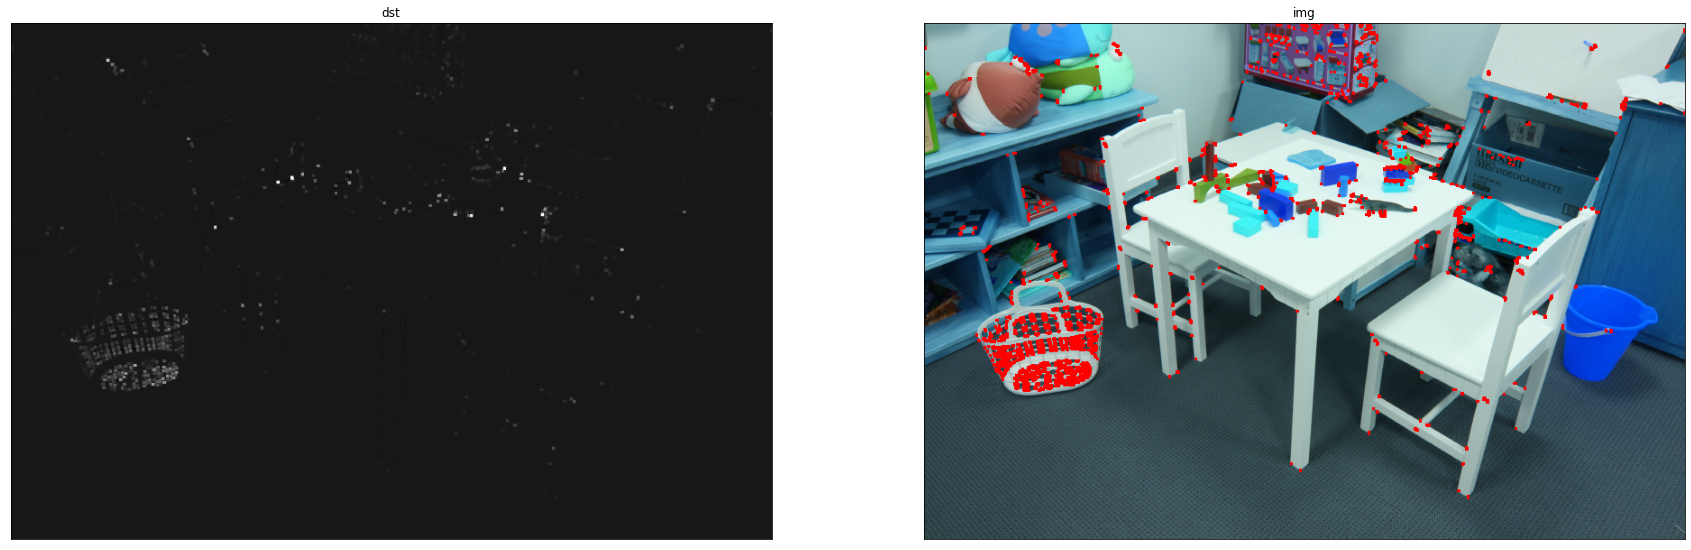

In [6]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(dst,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.show()

## with Trackbar

In [7]:
def nothing(x):
    pass

In [9]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()

## Corner with SubPixel Accuracy

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [22]:
filename = 'horse.bmp'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [23]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
print(ret,dst.shape)

1861669.76 (768, 1024)


In [24]:
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [25]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [27]:
res = np.hstack((centroids,corners))
res = np.int0(res)
print(res.shape)

(165, 4)


In [28]:
print(res)

[[ 511  383  511  383]
 [ 425  113  425  111]
 [ 454  111  451  109]
 [ 466  126  465  125]
 [ 440  128  438  126]
 [ 449  129  449  129]
 [ 434  131  433  133]
 [ 467  138  465  136]
 [ 430  139  428  138]
 [ 440  157  440  155]
 [ 488  159  485  156]
 [1006  158 1005  157]
 [1022  161 1021  161]
 [ 953  164  954  164]
 [ 494  166  490  165]
 [ 414  169  413  169]
 [ 836  172  837  172]
 [ 464  173  463  171]
 [ 418  175  418  175]
 [ 505  178  503  177]
 [ 922  176  920  173]
 [ 417  187  417  187]
 [ 500  187  501  186]
 [ 509  197  507  197]
 [ 418  205  418  205]
 [ 420  213  420  212]
 [ 524  212  522  212]
 [ 438  220  437  218]
 [ 212  217  212  217]
 [ 538  224  538  224]
 [ 461  228  459  227]
 [ 421  234  421  234]
 [ 540  235  541  235]
 [ 438  242  439  244]
 [ 749  241  749  241]
 [ 548  243  544  243]
 [ 424  246  423  246]
 [ 432  249  432  246]
 [ 763  248  762  247]
 [ 281  249  281  249]
 [ 715  250  715  248]
 [ 702  251  703  249]
 [ 744  251  744  250]
 [ 781  251

In [29]:
img = cv2.imread(filename)
oimg = cv2.imread(filename)
img[res[:,1],res[:,0]]=[0,0,255]
oimg[res[:,3],res[:,2]] = [0,255,0]

In [32]:
for i in range(res.shape[0]):
    cv2.circle(img,(res[i,0],res[i,1]),3,(255,0,0),-1)
    cv2.circle(oimg,(res[i,2],res[i,3]),5,(0,255,0),-1)

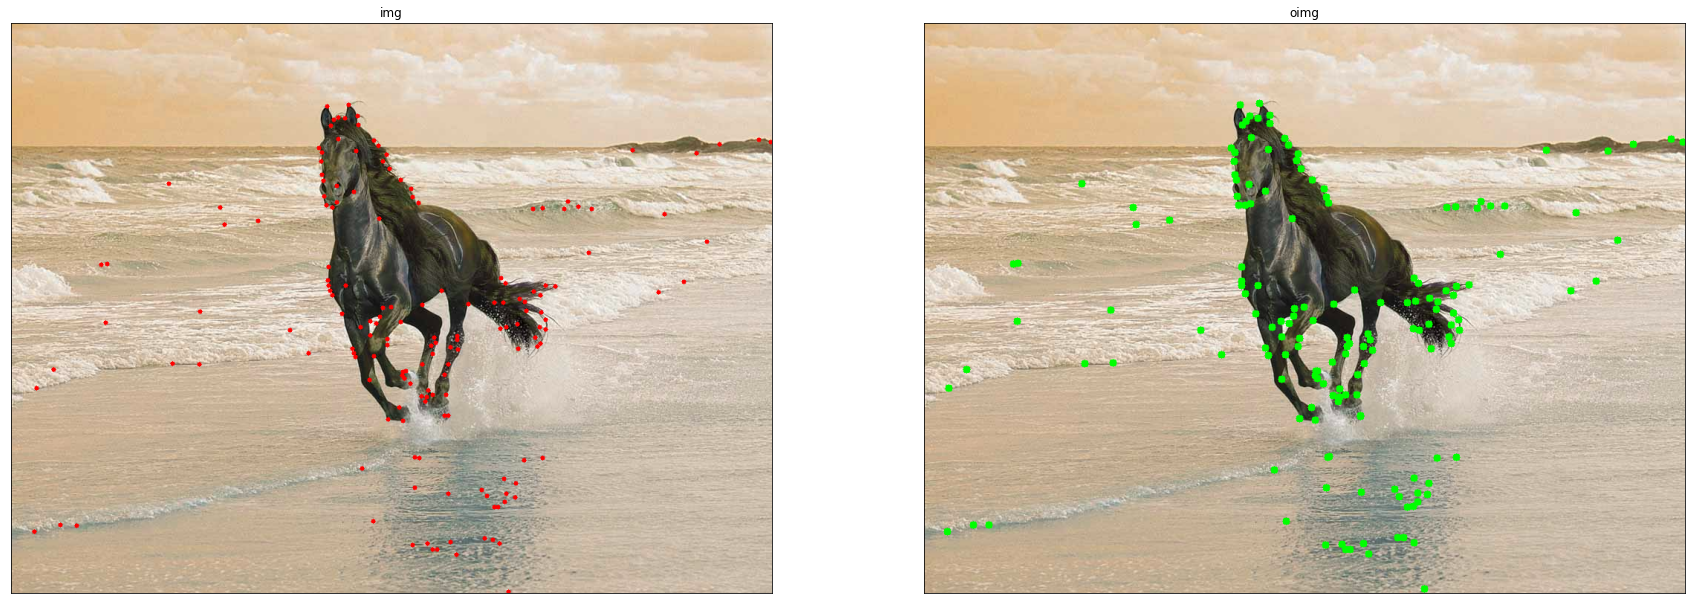

In [33]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img)
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(oimg)
plt.title('oimg'), plt.xticks([]), plt.yticks([])
plt.show()

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [35]:
img = cv2.imread('horse.bmp')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('horse.bmp')
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

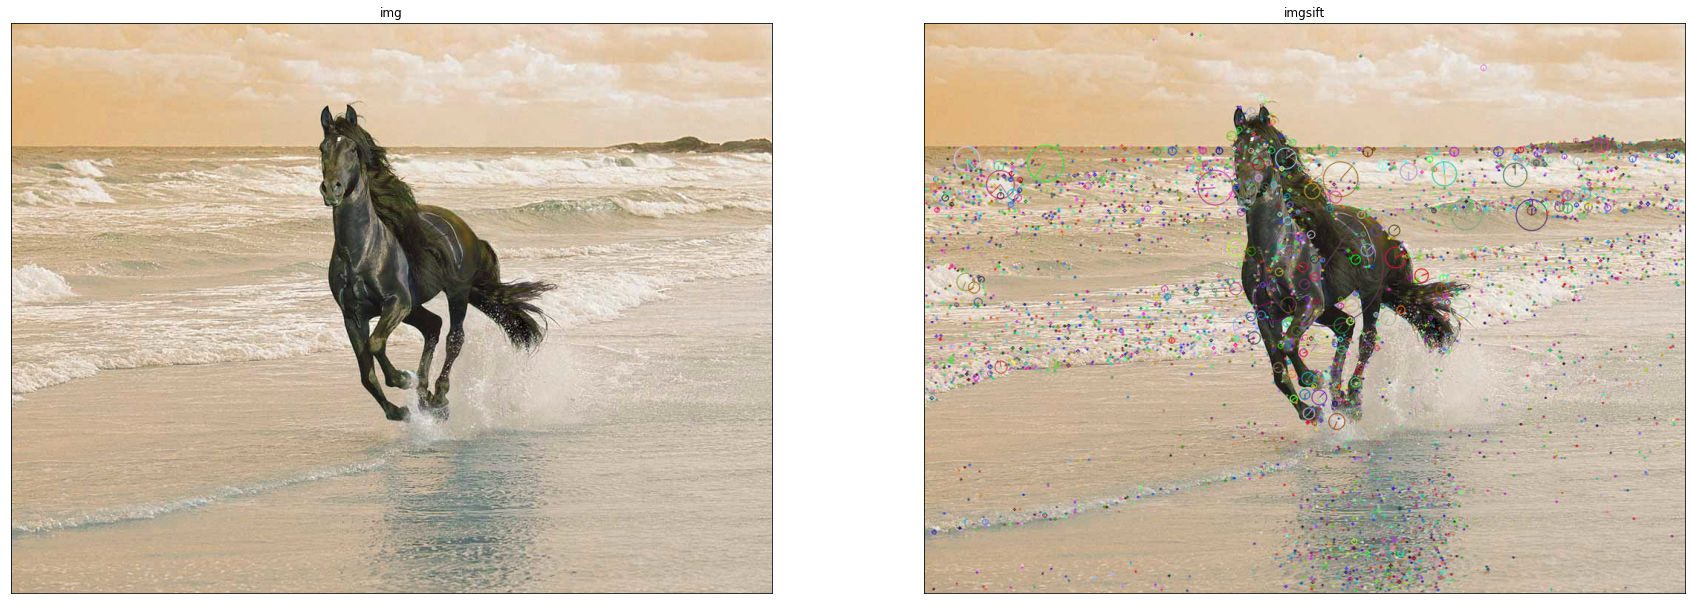

In [38]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])
plt.show()